<a href="https://colab.research.google.com/github/AlanaAnnaman/MLDATA/blob/main/Internetstuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode()
import plotly.express as px

import plotly.graph_objects as go
       #importing all libraries

In [34]:
df2 = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/advertising.csv') #read in the CSV file

In [35]:
df2.head() #displays the first 5 rows.

Daily Time Spent on Site  Age  ...            Timestamp  Clicked on Ad
0                     68.95   35  ...  2016-03-27 00:53:11              0
1                     80.23   31  ...  2016-04-04 01:39:02              0
2                     69.47   26  ...  2016-03-13 20:35:42              0
3                     74.15   29  ...  2016-01-10 02:31:19              0
4                     68.37   35  ...  2016-06-03 03:36:18              0

[5 rows x 10 columns]

In [36]:
df2.info #show the table information

<bound method DataFrame.info of      Daily Time Spent on Site  Age  ...            Timestamp  Clicked on Ad
0                       68.95   35  ...  2016-03-27 00:53:11              0
1                       80.23   31  ...  2016-04-04 01:39:02              0
2                       69.47   26  ...  2016-03-13 20:35:42              0
3                       74.15   29  ...  2016-01-10 02:31:19              0
4                       68.37   35  ...  2016-06-03 03:36:18              0
..                        ...  ...  ...                  ...            ...
995                     72.97   30  ...  2016-02-11 21:49:00              1
996                     51.30   45  ...  2016-04-22 02:07:01              1
997                     51.63   51  ...  2016-02-01 17:24:57              1
998                     55.55   19  ...  2016-03-24 02:35:54              0
999                     45.01   26  ...  2016-06-03 21:43:21              1

[1000 rows x 10 columns]>

In [37]:
df2.shape #shows 1000 cols and 10 rows

(1000, 10)

#EDA

In [38]:
# importing seaborn lib 
import seaborn as sns

In [39]:
# importing the mat lib
%matplotlib inline
import matplotlib.pyplot as plt

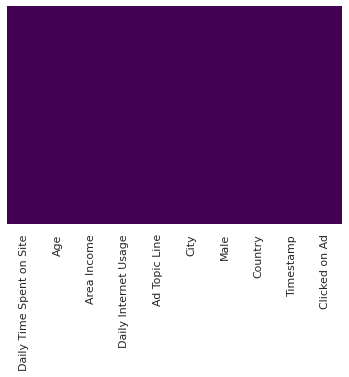

In [40]:
# i think using heatmapt to show null value 
sns.heatmap(df2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [41]:
df2.isnull().sum() #There are no nulls 

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

#Graph comparing Age VS Countries

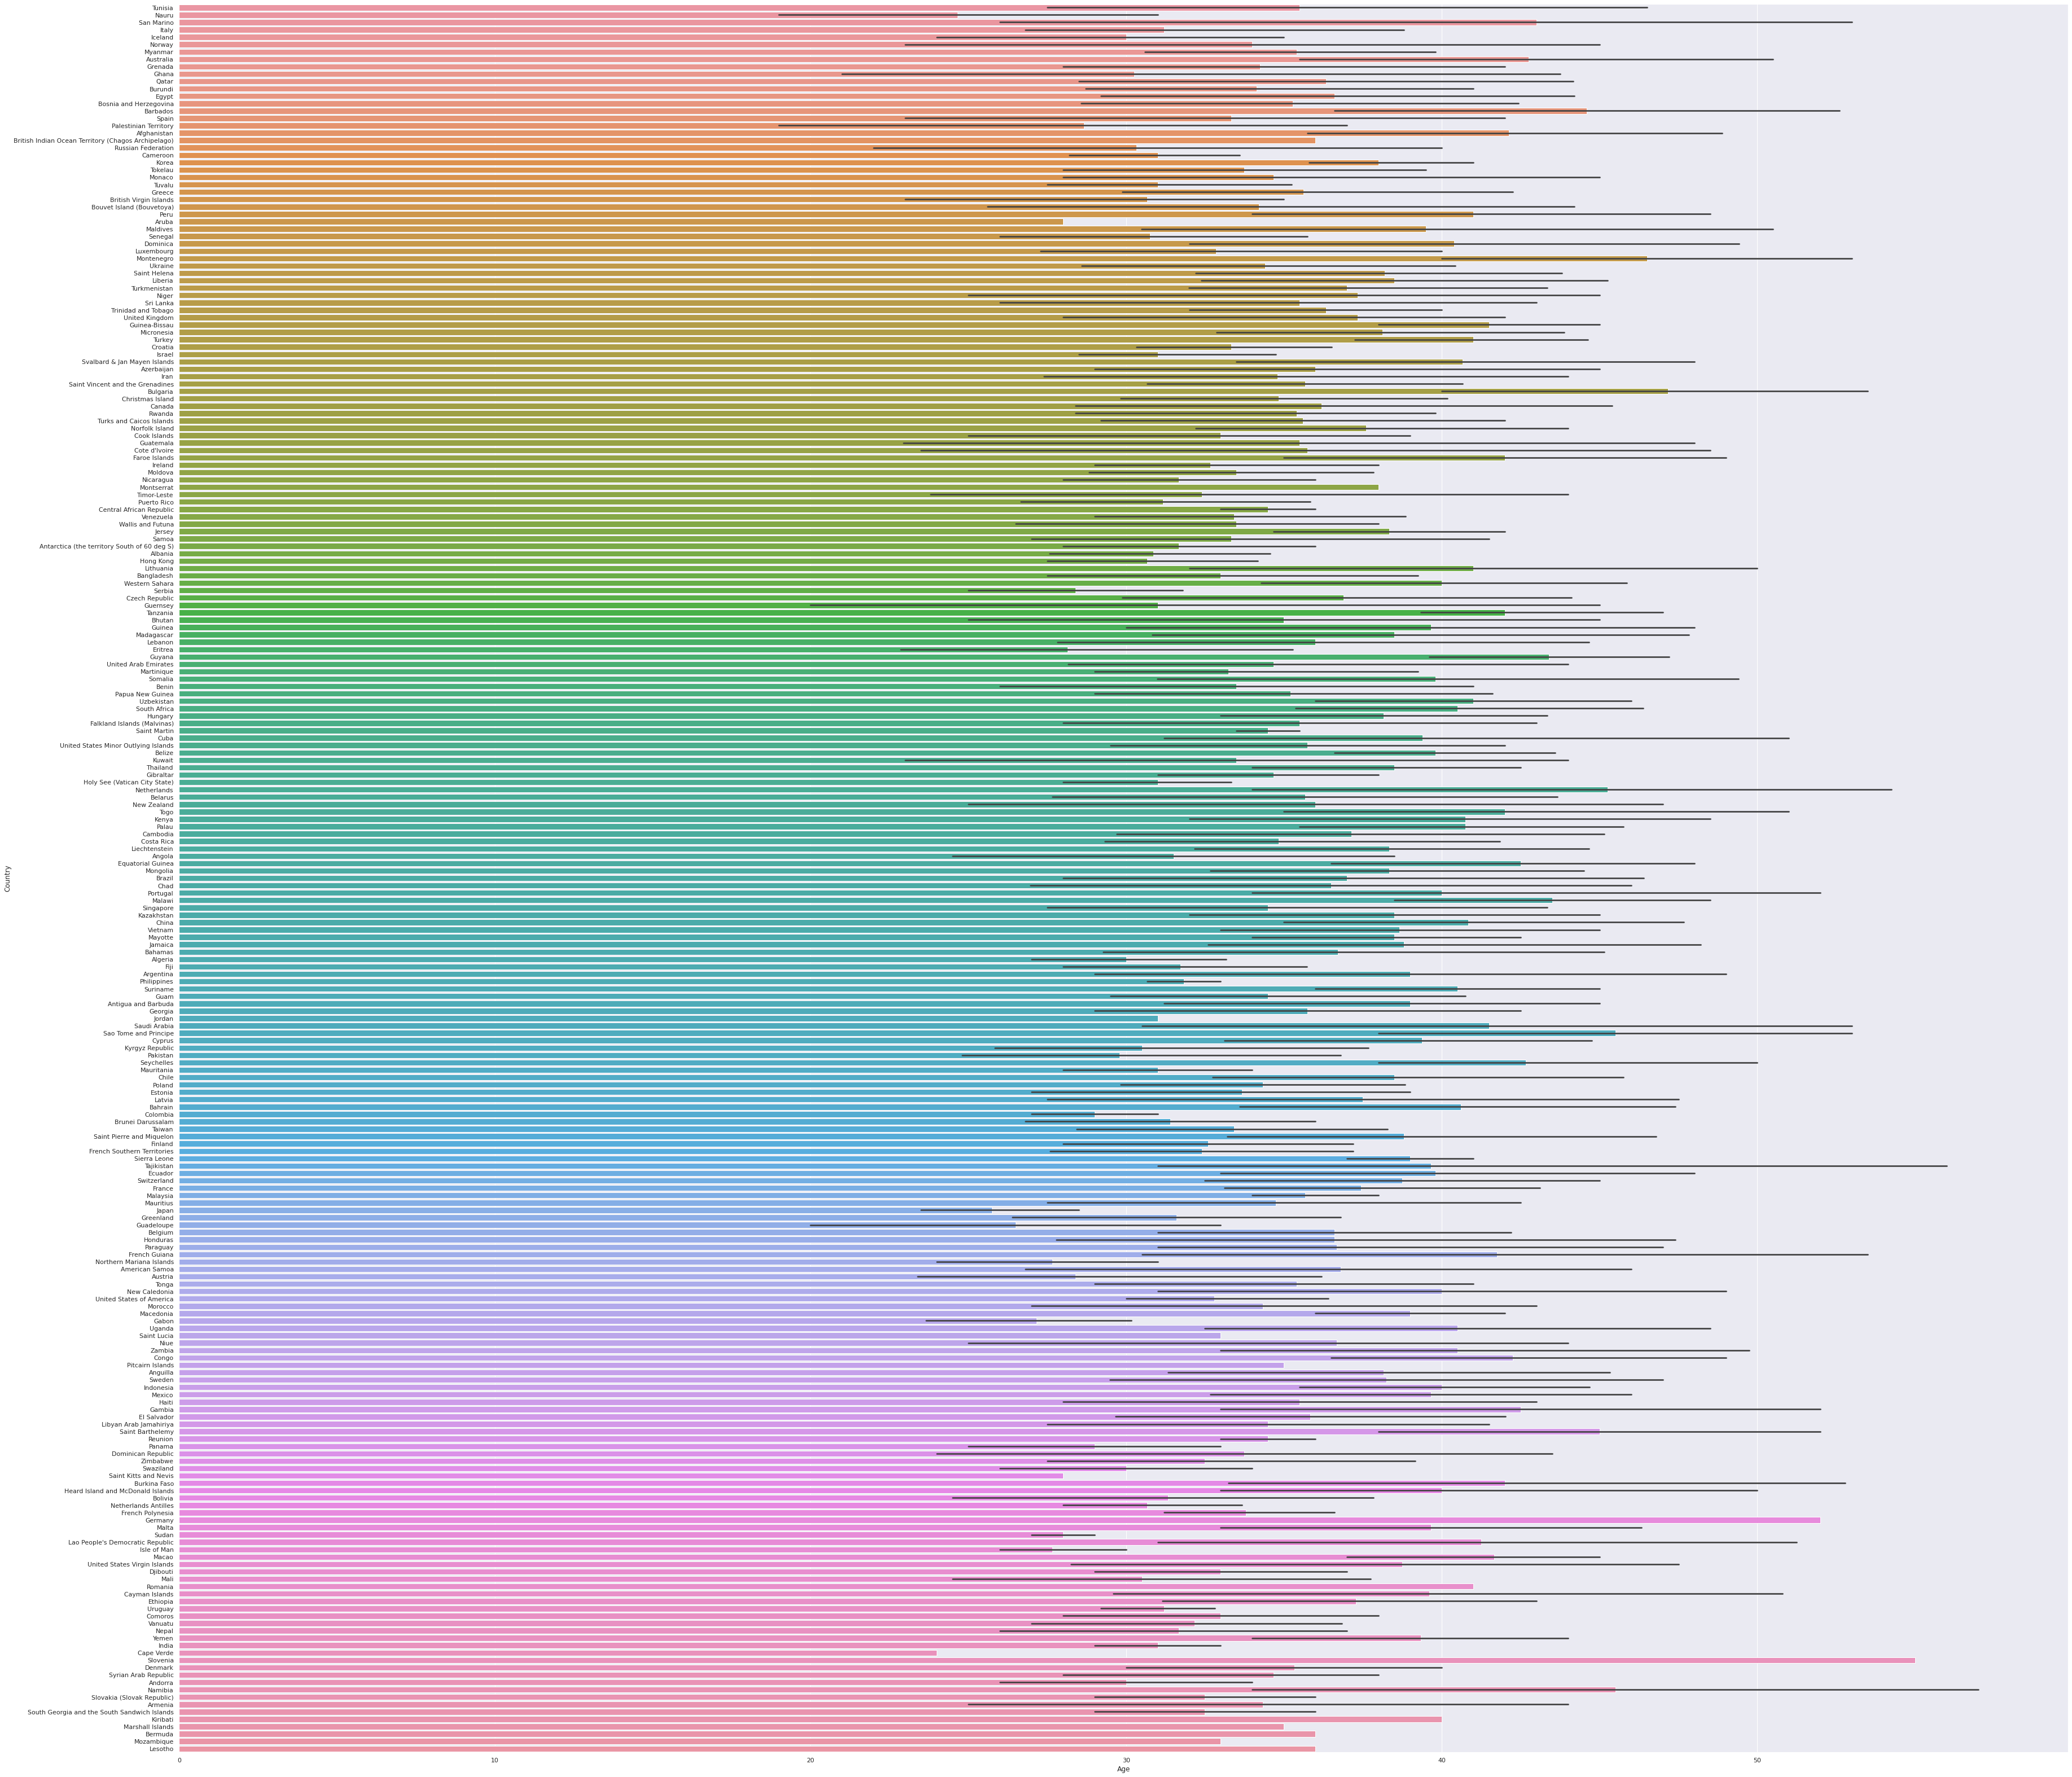

In [46]:
sns.set(rc={'figure.figsize':(60,57)}) #sidenote there needs to be a diffrence of 3
sns.barplot(x='Age',y='Country', data=df2)

In [47]:
df2.head()

Daily Time Spent on Site  Age  ...            Timestamp  Clicked on Ad
0                     68.95   35  ...  2016-03-27 00:53:11              0
1                     80.23   31  ...  2016-04-04 01:39:02              0
2                     69.47   26  ...  2016-03-13 20:35:42              0
3                     74.15   29  ...  2016-01-10 02:31:19              0
4                     68.37   35  ...  2016-06-03 03:36:18              0

[5 rows x 10 columns]

In [59]:
df2.nlargest(10, ['Daily Time Spent on Site']) #this table now shows the top 10 largest daily internet usage and 
 #we can conclude that french polynesia has the largest internet usage on a daily basis.


Daily Time Spent on Site  Age  ...            Timestamp  Clicked on Ad
533                     91.43   39  ...  2016-07-07 03:55:01              0
860                     91.37   45  ...  2016-04-01 07:37:18              1
927                     91.15   38  ...  2016-02-22 07:04:05              0
637                     91.10   40  ...  2016-03-07 22:51:00              0
321                     90.97   37  ...  2016-02-16 18:21:36              0
867                     90.75   40  ...  2016-03-11 09:58:32              0
102                     89.91   40  ...  2016-07-09 14:55:36              0
945                     89.80   36  ...  2016-02-02 04:57:50              0
988                     89.71   48  ...  2016-02-17 07:00:38              0
728                     89.66   34  ...  2016-02-03 15:15:42              0

[10 rows x 10 columns]

In [60]:
df3=df2[['Country','Daily Internet Usage']]

In [52]:
df3.head() 

Country  Daily Internet Usage
0     Tunisia                256.09
1       Nauru                193.77
2  San Marino                236.50
3       Italy                245.89
4     Iceland                225.58

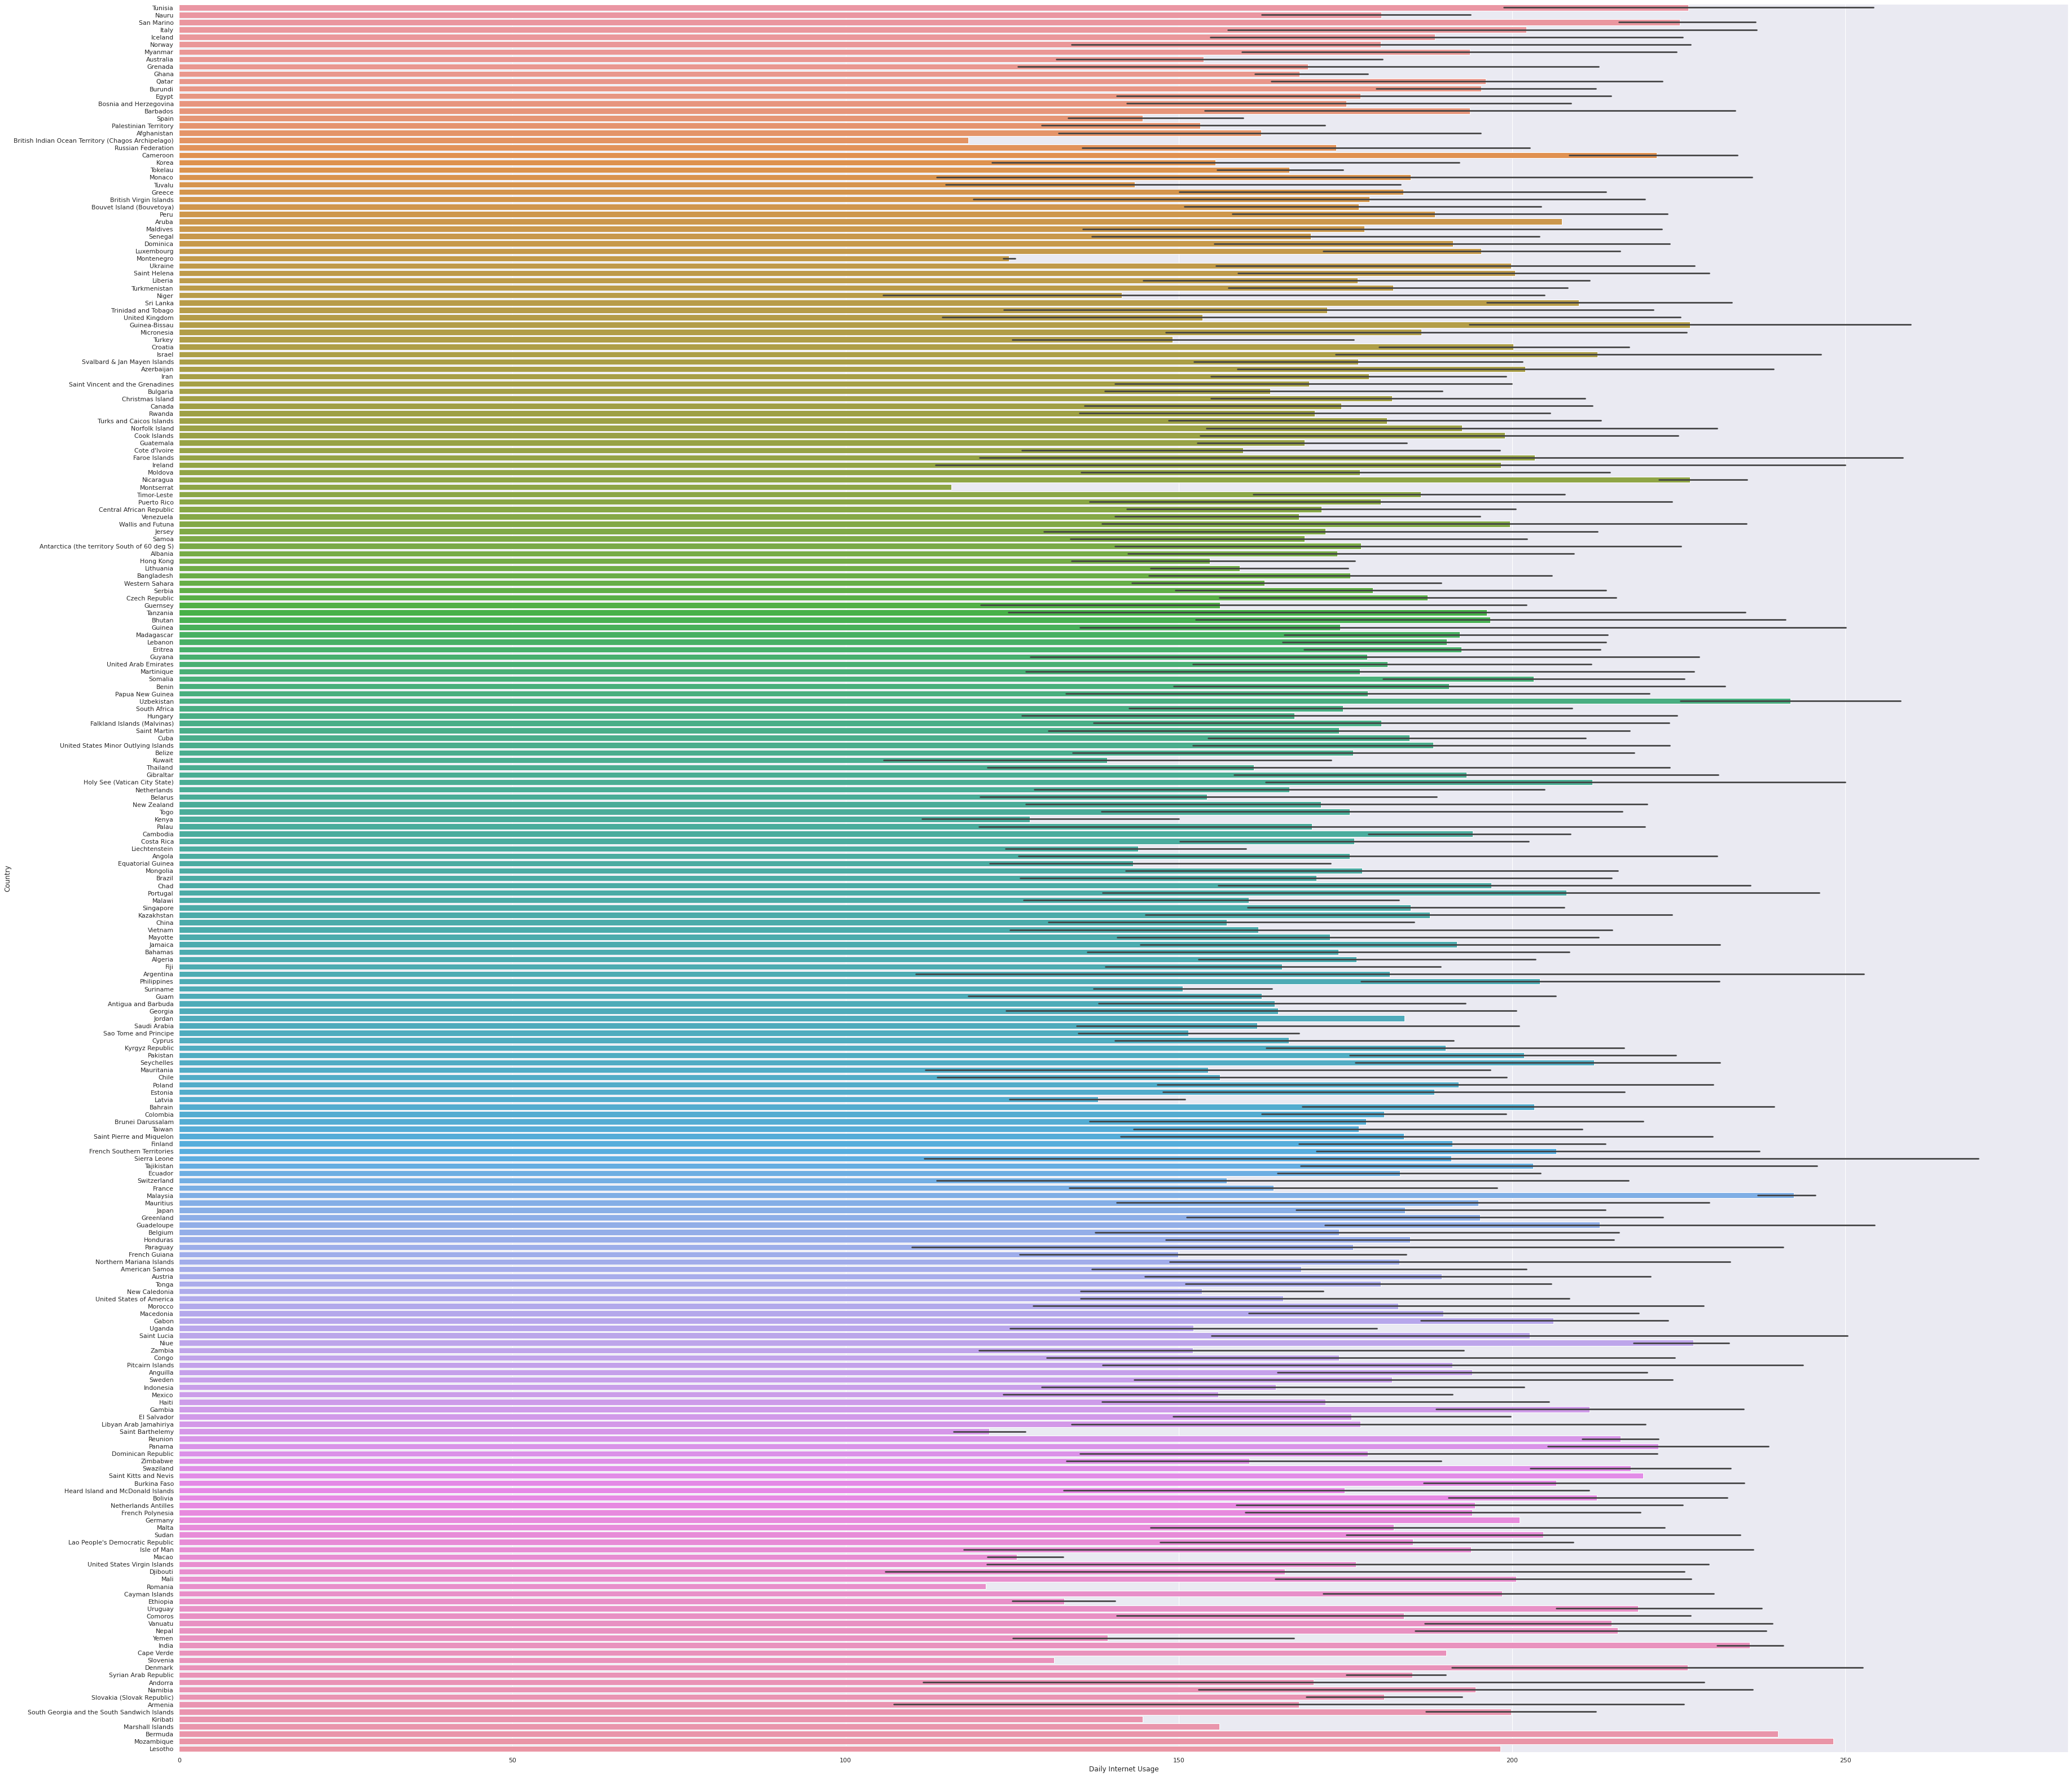

In [53]:
sns.barplot(x='Daily Internet Usage',y='Country', data=df3) #

#Classifying the gender of a person using logistic regression

In [ ]:
#Who uses internet the most F or M?

In [61]:
df2.head()

Daily Time Spent on Site  Age  ...            Timestamp  Clicked on Ad
0                     68.95   35  ...  2016-03-27 00:53:11              0
1                     80.23   31  ...  2016-04-04 01:39:02              0
2                     69.47   26  ...  2016-03-13 20:35:42              0
3                     74.15   29  ...  2016-01-10 02:31:19              0
4                     68.37   35  ...  2016-06-03 03:36:18              0

[5 rows x 10 columns]

#Remove COuntry, city, timestamp & add topic line, click on add, because it wouldnt be needed for binary classification.

In [62]:
df2.drop(columns=['Country','City','Timestamp','Ad Topic Line','Clicked on Ad'],inplace=True)

In [64]:
df2.head() #reflects updated df to be used for logistic regression model 

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
0                     68.95   35     61833.90                256.09     0
1                     80.23   31     68441.85                193.77     1
2                     69.47   26     59785.94                236.50     0
3                     74.15   29     54806.18                245.89     1
4                     68.37   35     73889.99                225.58     0

In [66]:
df2.isnull().sum()  #no null 

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
dtype: int64

#Splitting the data into test & train subsets

In [67]:
from sklearn.model_selection import train_test_split